## IMPORTING LIBRARIES

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import matplotlib.image as mpimg
%matplotlib inline

## LOADING MODEL

In [7]:
model = tf.keras.models.load_model('trained_cnn_model.keras')

In [3]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │       769,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,616,288 (63.39 MB)

 Trainable params: 5,538,762 (21.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,077,526 (42.26 MB)

## VISUALIZING SINGLE IMAGE

In [5]:
image_path = r"test\CornCommonRust1.JPG"

In [6]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Convert BGR img to RGB

([], [])

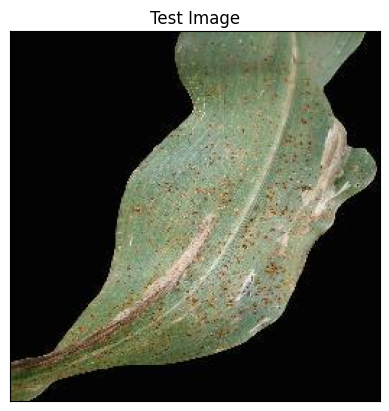

In [7]:
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])

## TESTING MODEL

In [8]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))

In [9]:
input_arr = tf.keras.preprocessing.image.img_to_array(image)

In [10]:
print(input_arr.shape)     #we wont be using this because this is a single image

(128, 128, 3)


In [11]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])     #we will use this because this will show single image in a batch
print(input_arr.shape)            #here the 1 represents the batch size, and we need a batch because we have trained aur model on batches

(1, 128, 128, 3)


In [12]:
predictions = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


In [13]:
predictions

array([[2.2290993e-15, 1.8913454e-20, 2.1505326e-17, 3.2618133e-19,
        2.1184045e-16, 1.3716780e-14, 1.7991331e-19, 1.4378853e-13,
        1.0000000e+00, 1.0919753e-18, 1.7535890e-15, 9.6712777e-24,
        2.5675789e-21, 7.5361089e-24, 7.0250652e-25, 3.7050320e-16,
        9.0085263e-19, 3.5321119e-19, 1.1526934e-15, 3.2137502e-15,
        4.8254300e-12, 6.3846477e-24, 1.9203403e-18, 7.9684625e-25,
        9.0973636e-23, 9.2628703e-21, 9.6274207e-20, 2.1437474e-20,
        1.4755329e-22, 3.7548454e-16, 6.7428438e-11, 2.3536468e-20,
        1.0899527e-18, 1.2685756e-25, 4.2645969e-23, 1.4140511e-22,
        1.1796003e-24, 2.6638411e-18]], dtype=float32)

In [14]:
predictions.shape

(1, 38)

In [15]:
result_index = np.argmax(predictions)

In [16]:
result_index

np.int64(8)

In [2]:
import json

with open(r"Training Specs\class_names.json", "r") as f:
    class_name = json.load(f)

In [3]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

## DISPLAYING RESULT

In [18]:
model_prediction = class_name[result_index]

In [19]:
model_prediction

'Corn_(maize)___Common_rust_'

([], [])

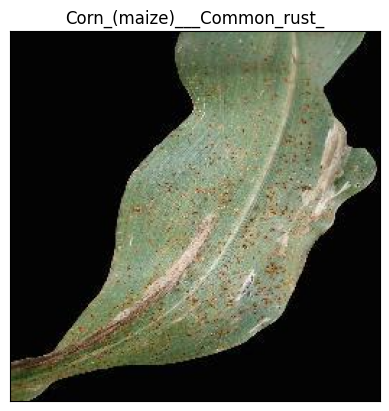

In [20]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(model_prediction)
plt.yticks([])
plt.xticks([])

## ANOTHER IMAGE TESTNG

(1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
The Image shown below is of  Apple___Apple_scab


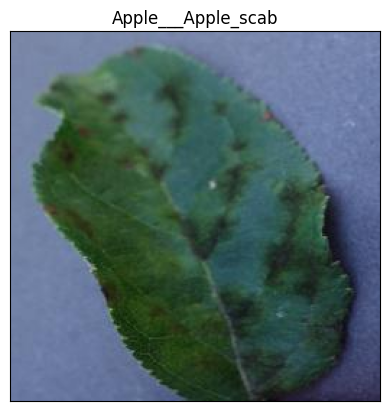

In [8]:
image_path = r"test\AppleScab2.JPG"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])    
print(input_arr.shape)
predictions = model.predict(input_arr)
result_index = np.argmax(predictions)
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(model_prediction)
plt.yticks([])
plt.xticks([])
print("The Image shown below is of ",model_prediction)